In [2]:
import tensorflow
import pandas
import matplotlib.pyplot
import sklearn.model_selection

In [3]:
df = pandas.read_csv("train.csv")
X = df[["OverallQual"]]
Y = df["SalePrice"]
Xtemp = df["OverallQual"]
xrange = Xtemp.std()
yrange = Y.std()
X /= xrange
Y /= yrange

In [4]:
X.describe()

,OverallQual
count,1460.000000
mean,4.410217
std,1.000000
min,0.723068
25%,3.615338
50%,4.338406
75%,5.061473
max,7.230676


In [5]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    X, Y, train_size=0.8, test_size=0.2,
)

In [6]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.Input(1),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(Xtrain, Ytrain, batch_size=1, epochs=30)

Epoch 1/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.4918
Epoch 2/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4264
Epoch 3/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4190
Epoch 4/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4045
Epoch 5/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4037
Epoch 6/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.3937
Epoch 7/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.3867
Epoch 8/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.3799
Epoch 9/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.3791
Epoch 10/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.3721
Epoch 11/30
1168/1168 [==============================] - 2s 2ms/step - loss: 0.3770
Epoch 12/30
1168/1168 [==============================] - 2s 1ms/step - loss: 0.3614
E

In [8]:
model.evaluate(Xtest, Ytest, batch_size=1)
Ypred = model.predict(Xtest)

10/10 [==============================] - 0s 2ms/step


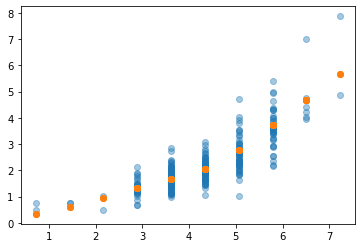

In [10]:
matplotlib.pyplot.scatter(Xtest, Ytest, alpha=0.4)
matplotlib.pyplot.scatter(Xtest, Ypred)
matplotlib.pyplot.show()